## Basic Statistic Concept

Here I try to use the data from youtube to explain some basic statistic concept that we could use in our everyday data science work

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
youtube = pd.read_csv('USvideos.csv')

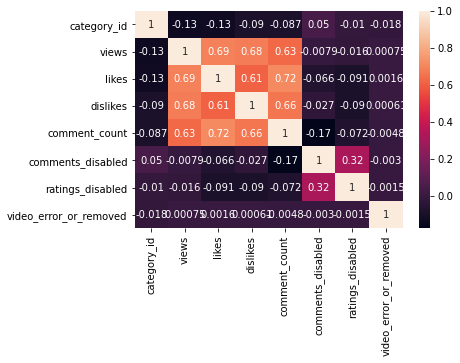

In [3]:
sns.heatmap(youtube.corr('kendall'), annot = True)

In [4]:
youtube.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40949 entries, 0 to 40948
Data columns (total 16 columns):
video_id                  40949 non-null object
trending_date             40949 non-null object
title                     40949 non-null object
channel_title             40949 non-null object
category_id               40949 non-null int64
publish_time              40949 non-null object
tags                      40949 non-null object
views                     40949 non-null int64
likes                     40949 non-null int64
dislikes                  40949 non-null int64
comment_count             40949 non-null int64
thumbnail_link            40949 non-null object
comments_disabled         40949 non-null bool
ratings_disabled          40949 non-null bool
video_error_or_removed    40949 non-null bool
description               40379 non-null object
dtypes: bool(3), int64(5), object(8)
memory usage: 4.2+ MB


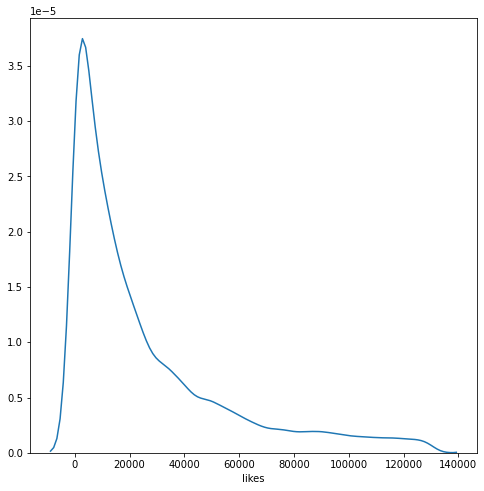

In [5]:
#Filtering the data based on the outlier of the likes column
Q1_like = youtube['likes'].describe()['25%']
Q3_like = youtube['likes'].describe()['75%']
IQR = Q3_like - Q1_like

plt.figure(figsize = (8,8))
sns.distplot(youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'], hist = False)

out_like = youtube[(youtube['likes'] >= Q1_like - (1.5*IQR)) & (youtube['likes'] <= Q3_like + (1.5 * IQR))]['likes'].index

In [6]:
#Only the data that is not outlier base on the like column
youtube_not = youtube.loc[out_like].copy()

In [7]:
#Tweak the data so it could be converted into datetime
youtube_not['trending_date'] = youtube_not['trending_date'].apply(lambda x: '{}.{}.{}'.format(x[3:5],x[6:],x[0:2]))
youtube_not['publish_time'] = youtube_not['publish_time'].apply(lambda x: x[:10])

In [8]:
pd.to_datetime(youtube_not['trending_date'])

0       2017-11-14
1       2017-11-14
3       2017-11-14
5       2017-11-14
6       2017-11-14
           ...    
40940   2018-06-14
40941   2018-06-14
40944   2018-06-14
40945   2018-06-14
40946   2018-06-14
Name: trending_date, Length: 35813, dtype: datetime64[ns]

In [9]:
youtube_not['publish_time'].value_counts()

2017-12-22    412
2018-02-05    389
2017-12-20    371
2018-05-08    344
2017-12-21    316
             ... 
2017-05-07      1
2017-02-10      1
2015-06-11      1
2006-07-23      1
2017-11-04      1
Name: publish_time, Length: 313, dtype: int64

In [10]:
youtube_not['trending_date'] = pd.to_datetime(youtube_not['trending_date'])
youtube_not['publish_time'] = pd.to_datetime(youtube_not['publish_time'])

In [11]:
#Create a new column called Trending Gap which is a days difference between the Trending Date and the Publishing Time
youtube_not['trending_gap'] = youtube_not['trending_date'] - youtube_not['publish_time']
youtube_not['trending_gap'] = youtube_not['trending_gap'].apply(lambda x: x.days)  

In [12]:
youtube_not.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35813 entries, 0 to 40946
Data columns (total 17 columns):
video_id                  35813 non-null object
trending_date             35813 non-null datetime64[ns]
title                     35813 non-null object
channel_title             35813 non-null object
category_id               35813 non-null int64
publish_time              35813 non-null datetime64[ns]
tags                      35813 non-null object
views                     35813 non-null int64
likes                     35813 non-null int64
dislikes                  35813 non-null int64
comment_count             35813 non-null int64
thumbnail_link            35813 non-null object
comments_disabled         35813 non-null bool
ratings_disabled          35813 non-null bool
video_error_or_removed    35813 non-null bool
description               35292 non-null object
trending_gap              35813 non-null int64
dtypes: bool(3), datetime64[ns](2), int64(6), object(6)
memory usage: 4

In [13]:
#Here I create new column for the total character from the title and the description
youtube_not['title_total_word'] = youtube_not['title'].apply(lambda x: len(x))
youtube_not['description_total_word'] = youtube_not['description'].apply(lambda x: len(str(x)))

Text(0.5, 1.0, 'Trending Gap')

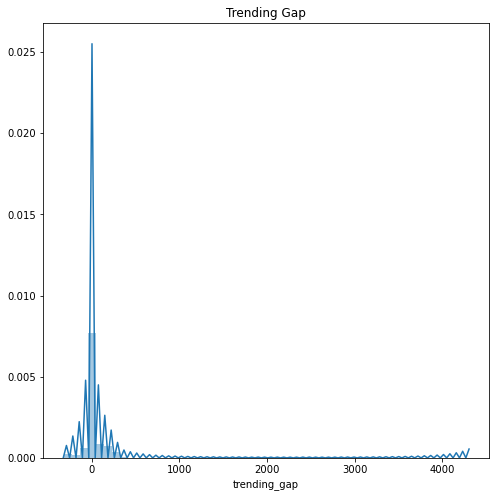

In [14]:
plt.figure(figsize = (8,8))
sns.distplot(youtube_not['trending_gap'])
plt.title('Trending Gap')

Text(0.5, 1.0, 'Title Total Word')

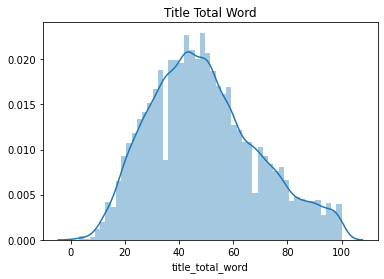

In [15]:
sns.distplot(youtube_not['title_total_word'])
plt.title('Title Total Word')

Text(0.5, 1.0, 'Description Total Word')

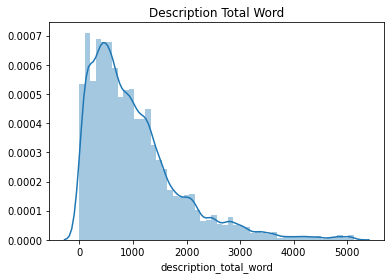

In [16]:
sns.distplot(youtube_not['description_total_word'])
plt.title('Description Total Word')

In [17]:
youtube_not[youtube_not['trending_gap'] > 1000]

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word
29,n30k5CwLhS4,2017-11-14,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29,"freaks and geeks|""jason segel""|""judd apatow""|""...",50867,715,238,246,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",2361,23,60
139,vd4zwINEcLY,2017-11-14,Live in the now!,poofables,24,2011-03-27,"cash|""Wayne's""|""World""|""wayne""|""waynes""|""fende...",95085,909,52,193,https://i.ytimg.com/vi/vd4zwINEcLY/default.jpg,False,False,False,"Stop torturing yourself man, you'll never affo...",2424,16,69
155,YqH4eWR7jDQ,2017-11-14,"The Oak Beams of New College, Oxford",Stewart Brand,27,2012-06-10,googlevideo,6412,49,0,2,https://i.ytimg.com/vi/YqH4eWR7jDQ/default.jpg,False,False,False,Reciting a tale I heard from Gregory Bateson.....,1983,36,87
250,qC0I5PEhkJo,2017-11-15,The perfect ice - Ice boats on Lake Geneva,MattMasonPhotography,17,2010-01-14,"Ice Boats|""Lake Geneva""|""5D Mark II""|""Fontana""...",94694,136,11,31,https://i.ytimg.com/vi/qC0I5PEhkJo/default.jpg,False,False,False,If you would like to see more of this kind of ...,2862,42,1341
304,n30k5CwLhS4,2017-11-15,Nick Andopolis: Drummer,FaeryInLoveInc,1,2011-05-29,"freaks and geeks|""jason segel""|""judd apatow""|""...",58469,828,253,271,https://i.ytimg.com/vi/n30k5CwLhS4/default.jpg,False,False,False,"The opening of Freaks and Geeks Episode 6, I'm...",2362,23,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15927,yq4mgb1PDTI,2018-03-02,1980 toyota corolla liftback commercial,Amarullah Rizky,2,2013-10-25,"Corolla Citytownvillage|""Dx""|""Ke70""|""Racing""|""...",10270,39,0,0,https://i.ytimg.com/vi/yq4mgb1PDTI/default.jpg,False,False,False,NaN,1589,39,3
16100,aHjS9YBXzXU,2018-04-02,Magic Highway USA,Joshua Levin,28,2013-10-20,"Transportation|""Future""|""Highways""",5391,57,0,3,https://i.ytimg.com/vi/aHjS9YBXzXU/default.jpg,False,False,False,Snippet of Disney program Magic Highway U.S.A....,1625,17,147
16147,yq4mgb1PDTI,2018-04-02,1980 toyota corolla liftback commercial,Amarullah Rizky,2,2013-10-25,"Corolla Citytownvillage|""Dx""|""Ke70""|""Racing""|""...",10345,39,0,0,https://i.ytimg.com/vi/yq4mgb1PDTI/default.jpg,False,False,False,NaN,1620,39,3
16294,MJO3FmmFuh4,2018-05-02,Budweiser - Original Whazzup? ad,dannotv,24,2006-07-23,"Budweiser|""Bud""|""Whazzup""|""ad""",258506,459,152,82,https://i.ytimg.com/vi/MJO3FmmFuh4/default.jpg,False,False,False,"Original Whazzup ad - however, there is a litt...",4301,32,80


<Figure size 576x576 with 0 Axes>

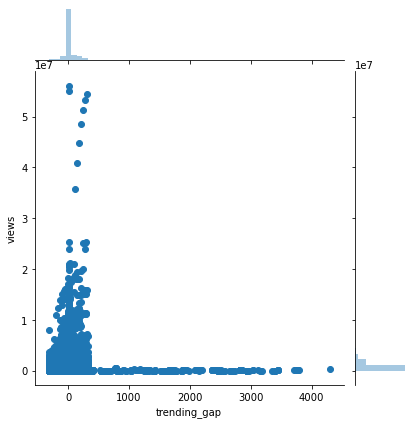

In [18]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'trending_gap', y = 'views')

<Figure size 576x576 with 0 Axes>

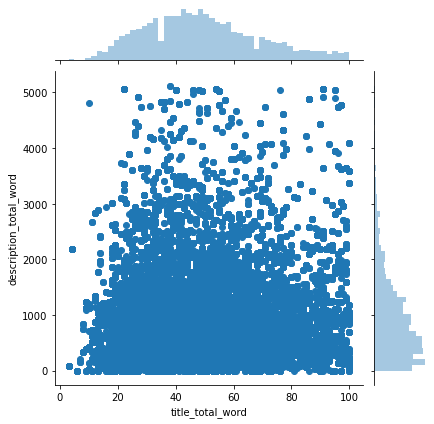

In [19]:
plt.figure(figsize = (8,8))
sns.jointplot(data = youtube_not, x = 'title_total_word', y = 'description_total_word')

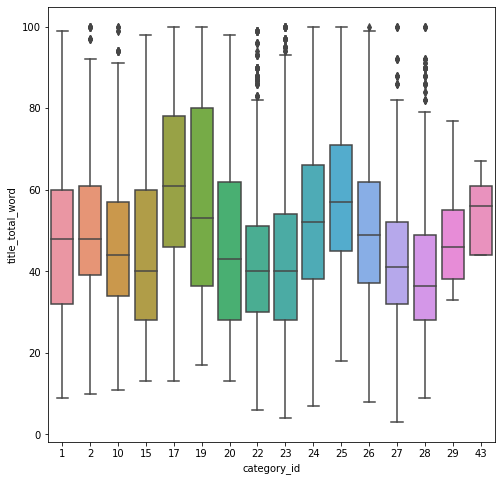

In [20]:
plt.figure(figsize = (8,8))
sns.boxplot(x = 'category_id', y = 'title_total_word', data = youtube_not)

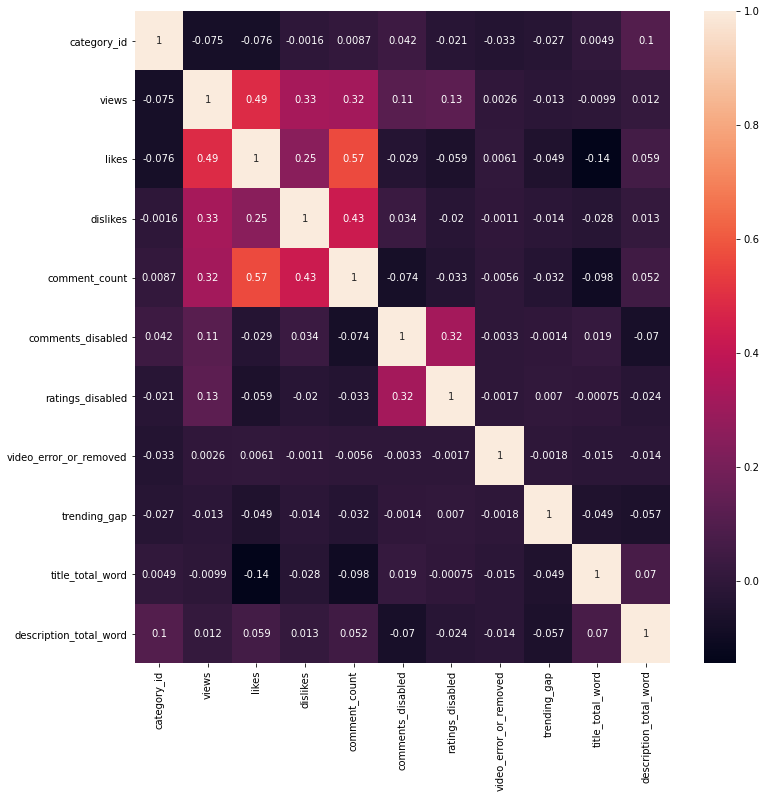

In [21]:
plt.figure(figsize = (12,12))
sns.heatmap(youtube_not.corr(), annot = True)

## Question

Why do you think there is a trend video that did not had no difference at all between the number of the likes and dislikes? Is there any interesting pattern from the data you could find? Show it with the data and visual if you find it interesting

In [22]:
youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John..."
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,18.14.06,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18T13:00:04.000Z,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,2657,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals
40945,1h7KV2sjUWY,18.14.06,True Facts : Ant Mutualism,zefrank1,22,2018-05-18T01:00:06.000Z,[none],1064798,60008,382,3936,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN
40946,D6Oy4LfoqsU,18.14.06,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18T17:34:22.000Z,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,3992,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...
40947,oV0zkMe1K8s,18.14.06,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17T17:00:04.000Z,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,13088,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...


In [23]:
youtube['trending_date'] = youtube['trending_date'].apply(lambda x: '20{}-{}-{}'.format(x[0:2],x[6:],x[3:5] ))
youtube['publish_time'] = youtube['publish_time'].apply(lambda x: x[:10])
youtube['trending_date'] = pd.to_datetime(youtube['trending_date'])
youtube['publish_time'] = pd.to_datetime(youtube['publish_time'])
youtube['trending_gap'] = youtube['trending_date'] - youtube['publish_time']
youtube['trending_gap'] = youtube['trending_gap'].apply(lambda x: x.days)  
youtube['title_total_word'] = youtube['title'].apply(lambda x: len(x))
youtube['description_total_word'] = youtube['description'].apply(lambda x: len(str(x)))

In [24]:
# I create a new column called like_delta, which basically differences of number between likes and disilikes
youtube['like_delta'] = youtube['likes'] - youtube['dislikes']

In [25]:
# Data where the differences is 0
youtube_0_delta = youtube[youtube['like_delta'] == 0]

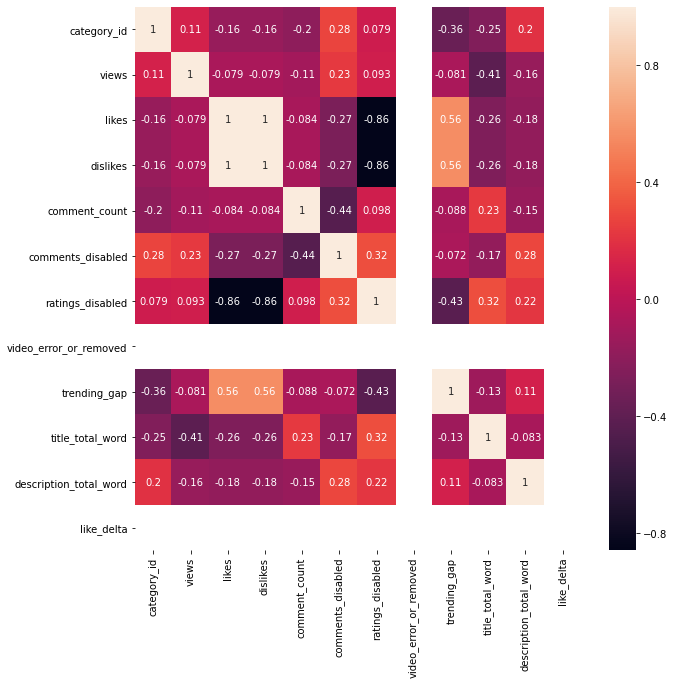

In [26]:
plt.figure(figsize = (10,10))
sns.heatmap(youtube_0_delta.corr(), annot = True)

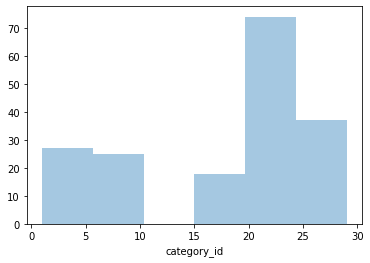

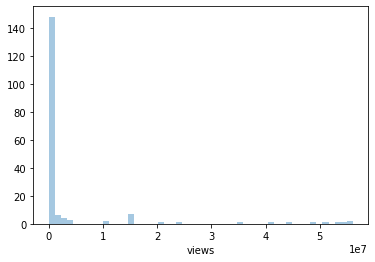

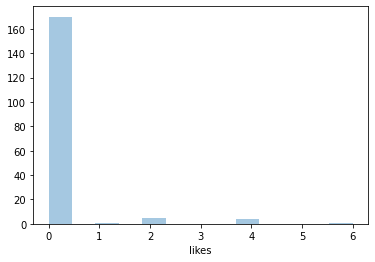

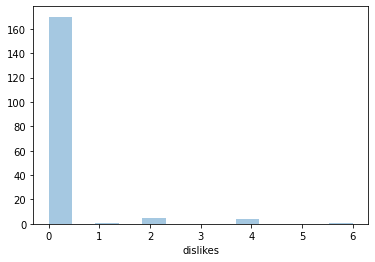

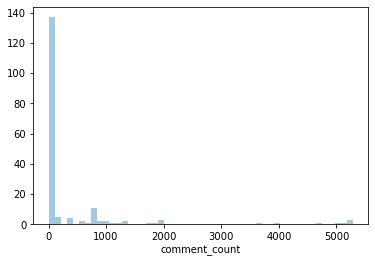

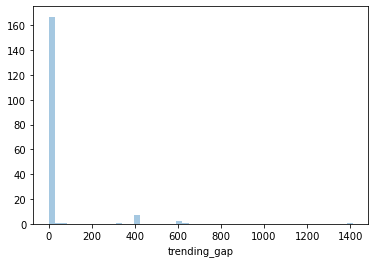

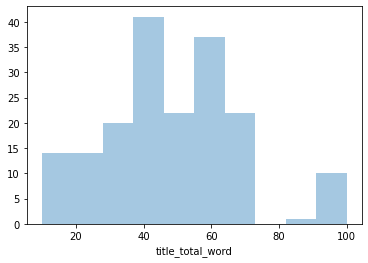

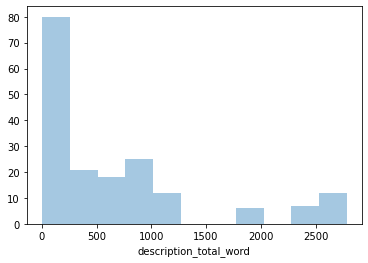

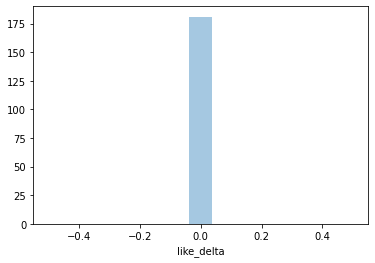

In [27]:
for i in youtube_0_delta.select_dtypes('number').columns:
    sns.distplot(youtube_0_delta[i], kde = False)
    plt.show()

I previously read that trending Video on youtube is basically if your video could have lot of view in the minimum time. Although for the purpose of the study I would also look at the statistic between 2 class.

In [28]:
youtube_delta = youtube[youtube['like_delta'] != 0]

In [29]:
youtube['trending_gap'].describe()

count    40949.000000
mean        16.810423
std        146.014303
min          0.000000
25%          3.000000
50%          5.000000
75%          9.000000
max       4215.000000
Name: trending_gap, dtype: float64

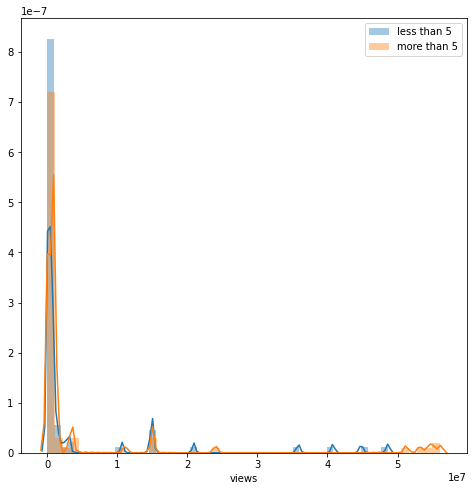

In [30]:

#As the median of the trending_gap is 5, I want to see if there is differences between number of view when the trending day 
#differences is less or equal than 5 compared to more than 5
plt.figure(figsize = (8, 8))
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], label = 'less than 5')
sns.distplot(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], label = 'more than 5')

plt.legend()

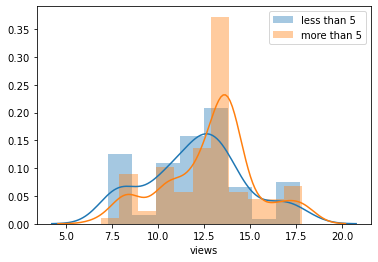

In [31]:
#data transformation with Log to make it normal
#log base e (2.72)
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), label = 'less than 5')
sns.distplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']), label = 'more than 5')
plt.legend()

In [32]:
#Now let us see the skewness and the kurtosis of the data
from scipy.stats import skew, kurtosis

In [33]:
# If the skewness is between -0.5 and 0.5, the data are fairly symmetrical
# If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed
# If the skewness is less than -1 or greater than 1, the data are highly skewed

skew(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']))

0.0736676134782628

In [34]:
# If the kurtosis is close to 0, then a normal distribution is often assumed.  These are called mesokurtic distributions.  
# If the kurtosis is less than 0, then the distribution is light tails and is called a platykurtic distribution.  
# If the kurtosis is greater than 0, then the distribution has heavier tails and is called a leptokurtic distribution.

kurtosis(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']))

-0.4116629456256282

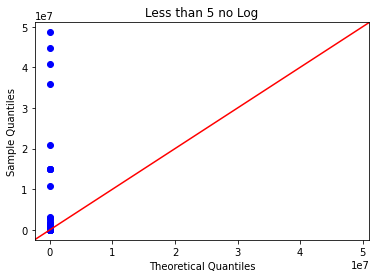

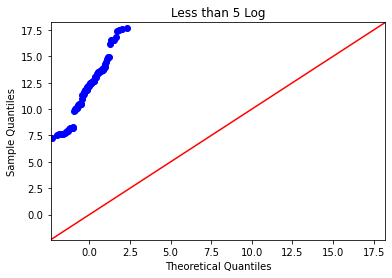

In [35]:
#Using QQ-Plot to check the data normality, if the quantile following the red line it would be following normal distribution

import statsmodels.api as sm
import pylab

sm.qqplot(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], line = '45')
plt.title('Less than 5 no Log')

sm.qqplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), line = '45')
plt.title('Less than 5 Log')
pylab.show()

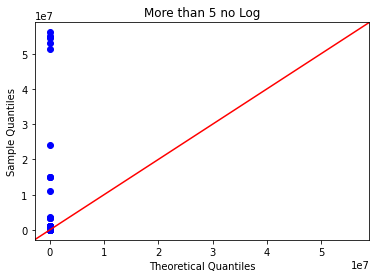

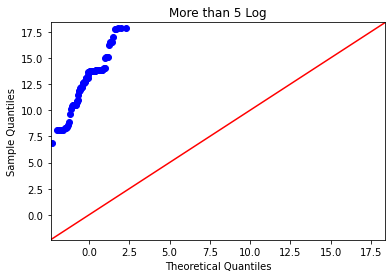

In [36]:
sm.qqplot(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], line = '45')
plt.title('More than 5 no Log')

sm.qqplot(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']), line = '45')
plt.title('More than 5 Log')
pylab.show()

In [37]:
#Done the Normality Test
from scipy.stats import shapiro, normaltest, anderson
def try_normal(data):
    result = {'Anderson' : {i:j for i,j in zip(anderson(data)[2], anderson(data)[1])}, 'Shapiro': shapiro(data)[1], 
     'K^2': normaltest(data)[1]}
    result['Anderson']['stat'] = anderson(data)[0]
    return result

In [38]:
# Anderson is stat < critical value for accepting H0 (fail to reject H0) when data = is normal distributed
#(or the designed dist)
# Anderson is stat > critical value for rejecting H0 (Accept H1) when data =/= is normal distributed (or the designed dist)

anderson(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

AndersonResult(statistic=24.02576959139961, critical_values=array([0.554, 0.63 , 0.756, 0.882, 1.049]), significance_level=array([15. , 10. ,  5. ,  2.5,  1. ]))

In [39]:
#Goodness fit of test, apapun yang menguji data kita menhgikuti suatu distribusi dinamakan goodness fit of test
#H0 : Data mengikuti Distribusi yang ditentukan (ex: Normal)
#H1: Data tidak mengikuti distribusi yang ditentukan 

try_normal(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

{'Anderson': {15.0: 0.554,
  10.0: 0.63,
  5.0: 0.756,
  2.5: 0.882,
  1.0: 1.049,
  'stat': 24.02576959139961},
 'Shapiro': 7.157133100820156e-18,
 'K^2': 1.095663548153668e-21}

In [40]:
shapiro(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'])

(0.3813357949256897, 7.157133100820156e-18)

In [41]:
try_normal(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']))

{'Anderson': {15.0: 0.554,
  10.0: 0.63,
  5.0: 0.756,
  2.5: 0.882,
  1.0: 1.049,
  'stat': 0.8879275990190933},
 'Shapiro': 0.012300082482397556,
 'K^2': 0.7320825848821937}

In [42]:
try_normal(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

{'Anderson': {15.0: 0.553,
  10.0: 0.63,
  5.0: 0.755,
  2.5: 0.881,
  1.0: 1.048,
  'stat': 23.931929988695885},
 'Shapiro': 1.1025540015556059e-17,
 'K^2': 1.0782682018831201e-19}

In [43]:
try_normal(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']))

{'Anderson': {15.0: 0.553,
  10.0: 0.63,
  5.0: 0.755,
  2.5: 0.881,
  1.0: 1.048,
  'stat': 2.2772091475331564},
 'Shapiro': 0.0006178623298183084,
 'K^2': 0.6324185227524219}

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  if __name__ == '__main__':


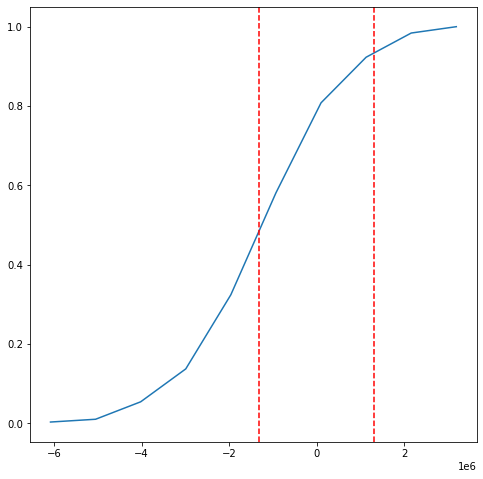

In [44]:
def mean_differences(x1, x2, n_boot):
    ori_mean = x1.mean() - x2.mean()
    mean_diff = []
    for i in range(n_boot):
        x1_mean = x1.sample(len(x1), replace = True).mean()
        x2_mean = x2.sample(len(x1), replace = True).mean()   
        mean_diff.append(x1_mean - x2_mean)
        
    hist,hist_edges = np.histogram(mean_diff, normed = True)
    dx = hist_edges[1] - hist_edges[0]
    F1 = np.cumsum(hist)*dx
    plt.figure(figsize = (8,8))
    plt.plot(hist_edges[1:], F1)
    
    plt.axvline(ori_mean, ls = '--', c ='red')
    plt.axvline(ori_mean * -1, ls = '--', c ='red')
        
#Buat CDF perbedaan Mean X1 dengan X2 yang dibootstrap dan didapatkan perbedaan meannya. Dibuat histogram dr perbedaan meannya,
#dan CDF. Garis merah ini menunjukkan letak mean difference aslinya (positive ataupun negative)
#plt.axvline(letaknya, c = 'warna', ls = 'tipe garis')
mean_differences(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                 youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'], 1000 )        

In [45]:
#H0 : Tidak ada perbedaan view saat trending gap <= 5 dan trending gap > 5
from scipy.stats import ttest_ind
result = list(ttest_ind(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -0.8008108337508539
P-Value: 0.4243028032845608


In [46]:
from scipy.stats import ttest_ind
result = list(ttest_ind(np.log(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views']), 
                        np.log(youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])))
print('T-Statistic:', result[0])
print('P-Value:', result[1])

T-Statistic: -2.0201551112371248
P-Value: 0.044858119610026635


In [47]:
pd.concat([youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'].reset_index(drop = True), 
           youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'].reset_index(drop =True)], axis =1).corr('spearman')

,views,views
views,1.000000,0.383027
views,0.383027,1.000000


In [48]:
from scipy.stats import levene, bartlett

#Bartlett and Levene are test to see if the both sample have equal variance or not.
#Both test have H0: Equal Variance and H1: The Variance between the group is different

#We use the Bartlett test if the samples are come from the Normal Distribution and Levene test if the sample are skewed or 
#deviate from the normal distribution 

def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat' : bartlett(x1,x2)[0], 'P-Value': bartlett(x1,x2)[1] },
             'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result
try_equal_var(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
              youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views'])

{'Bartlett': {'Bartlett-Stat': 8.615008091273664,
  'P-Value': 0.0033340431598864596},
 'Levene': {'Levene-Stat': 0.5408472132471811, 'P-Value': 0.46304432742841817}}

In [49]:
#Non-Parametric Test jika asumsi untuk Parametric Test tidak terpenuhi
#mannwhitneyu test sebanding dengan independent t-test dalam artian melihat perbedaan satu kelompok dengan kelompok lainnya. 

from scipy.stats import mannwhitneyu
result = list(mannwhitneyu(youtube_0_delta[youtube_0_delta['trending_gap'] <= 5]['views'], 
                        youtube_0_delta[youtube_0_delta['trending_gap'] > 5]['views']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

#kasih batas confident, kalau 95% berarti batasnya 0.05 
#<0.05 berarti H0 ditolak, lebih dari =>0.05 H0 tidak ditolak

U-Statistic: 3088.0
P-Value: 0.002163358584802804


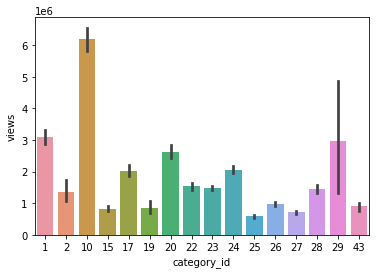

In [50]:
sns.barplot(data = youtube, x = 'category_id', y ='views')

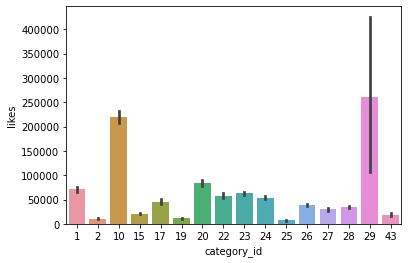

In [51]:
sns.barplot(data = youtube, x = 'category_id', y ='likes')

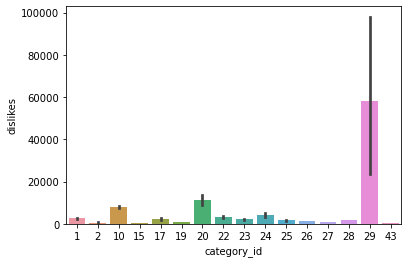

In [52]:
sns.barplot(data = youtube, x = 'category_id', y ='dislikes')

## Question

Saya pernah membaca bahwa Trend video juga tergantung kategori, jika kita barplot kan category 10 dan 29 memiliki mean yang tertinggi (walau mean dari 29 besar jaraknya) berarti mereka menarik banyak view. Tetapi apakah mereka berbeda secara view, like, dan dislikesnya?

In [53]:
youtube_29 = youtube[youtube['category_id']  == 29]
youtube_10 = youtube[youtube['category_id']  == 10]

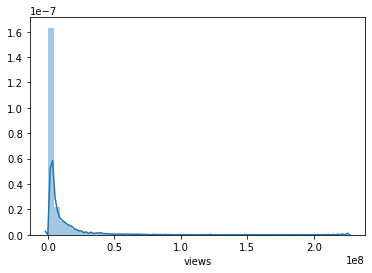

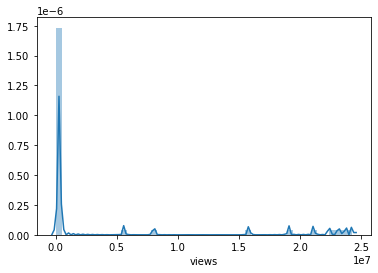

In [54]:
sns.distplot(youtube_10['views'])
plt.show()
sns.distplot(youtube_29['views'])
plt.show()

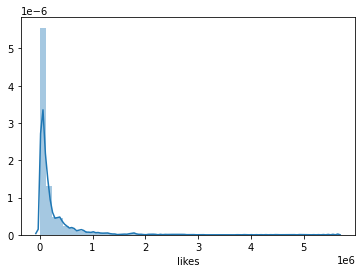

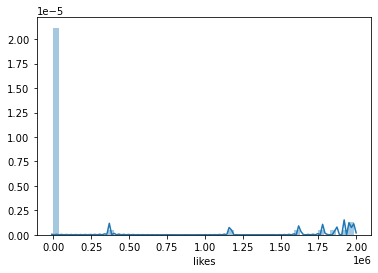

In [55]:
sns.distplot(youtube_10['likes'])
plt.show()
sns.distplot(youtube_29['likes'])
plt.show()

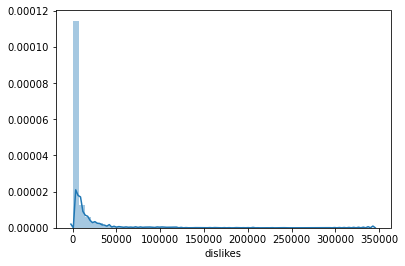

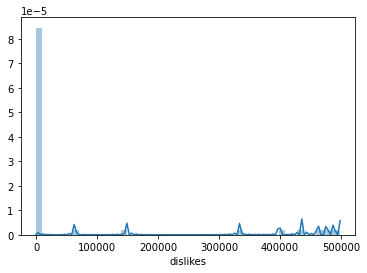

In [56]:
sns.distplot(youtube_10['dislikes'])
plt.show()
sns.distplot(youtube_29['dislikes'])
plt.show()

In [57]:
def create_qqplot(data,title):
    sm.qqplot(data, line = '45')
    plt.title(title)
    pylab.show()

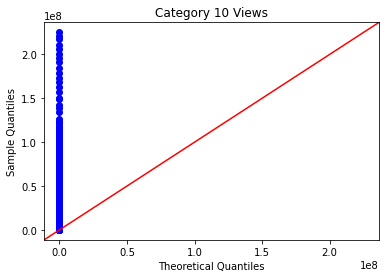

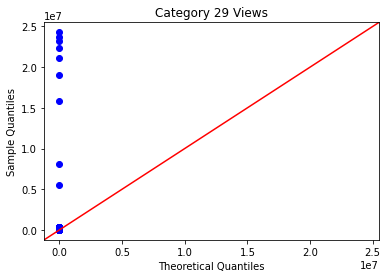

In [58]:
create_qqplot(youtube_10['views'], 'Category 10 Views')
create_qqplot(youtube_29['views'], 'Category 29 Views')

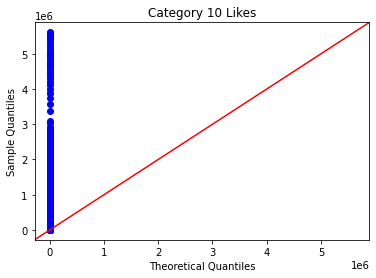

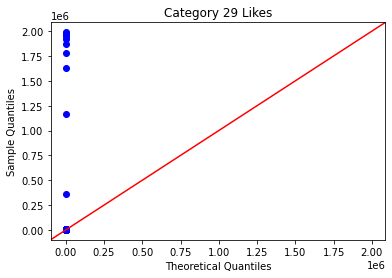

In [59]:
create_qqplot(youtube_10['likes'], 'Category 10 Likes')
create_qqplot(youtube_29['likes'], 'Category 29 Likes')

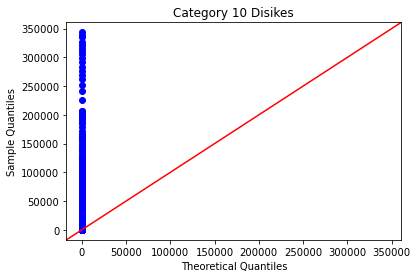

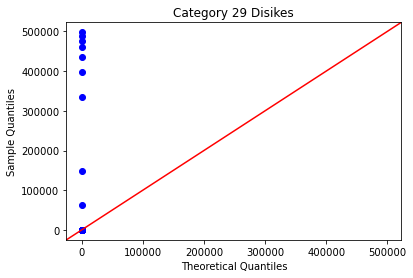

In [60]:
create_qqplot(youtube_10['dislikes'], 'Category 10 Disikes')
create_qqplot(youtube_29['dislikes'], 'Category 29 Disikes')

In [61]:
for i in ['views', 'likes', 'dislikes']:
    for key,val in {'cat_10' : youtube_10, 'cat_29': youtube_29}.items():
        print(key+' '+i)
        print(try_normal(val[i]))
        print('\n')

cat_10 views
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.917, 1.0: 1.091, 'stat': 1190.1770512259227}, 'Shapiro': 0.0, 'K^2': 0.0}


cat_29 views
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'stat': 15.03917848327174}, 'Shapiro': 3.174725022800362e-13, 'K^2': 7.110325304841888e-09}


cat_10 likes
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.917, 1.0: 1.091, 'stat': 1059.63100476604}, 'Shapiro': 0.0, 'K^2': 0.0}


cat_29 likes
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'stat': 15.770348198612865}, 'Shapiro': 2.335269564529563e-13, 'K^2': 4.61018340359511e-08}


cat_10 dislikes
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.917, 1.0: 1.091, 'stat': 1398.5780660629043}, 'Shapiro': 0.0, 'K^2': 0.0}


cat_29 dislikes
{'Anderson': {15.0: 0.542, 10.0: 0.617, 5.0: 0.741, 2.5: 0.864, 1.0: 1.028, 'stat': 15.941865855475612}, 'Shapiro': 1.6795371788214802e-13, 'K^2': 5.222212259578384e-09}




C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


The original data not following Normal Distribution, in this time if we want to test the differences between these 2 data it would be hard to use the parametric test. In this case, we would try to use the Non-Parametric Test.

In [62]:
result = list(mannwhitneyu(youtube_10['views'], 
                        youtube_29['views']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 78978.5
P-Value: 4.876291818247057e-14


In [63]:
result = list(mannwhitneyu(youtube_10['likes'], 
                        youtube_29['likes']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 81875.0
P-Value: 2.2471001015367116e-13


In [64]:
len(youtube_10)

6472

In [65]:
result = list(mannwhitneyu(youtube_10['dislikes'], 
                        youtube_29['dislikes']))
print('U-Statistic:', result[0])
print('P-Value:', result[1])

U-Statistic: 91647.5
P-Value: 2.876019645817286e-11


From the statistic, it seems that there are significant differences between the views, likes and the dislikes of the category 10 and 29.
It gave us an evidence to said that category 10 and 29 are even thou they both trending video, but their trending would have a different pattern. Although, the statistical result could also happen because the size differences between the category is big.

Until now we only check the differences between 2 group, but how about if we want to check the differences for more than 2 group? This time we would use the ANOVA test to test if there are differences between 3 or more group. 

For this time, I also want to include category 20 to see if views in category 10, 20, and 29 really are different or not. Mind you, I would certainly violate some of the assumption (mainly normality).

In [66]:
youtube_29 = youtube[youtube['category_id']  == 29]
youtube_10 = youtube[youtube['category_id']  == 10]
youtube_20 = youtube[youtube['category_id'] == 20]

Because we talk about ANOVA which based on the differences between variances rather than the mean, let's apply few test to check if our sample have equal variance or not

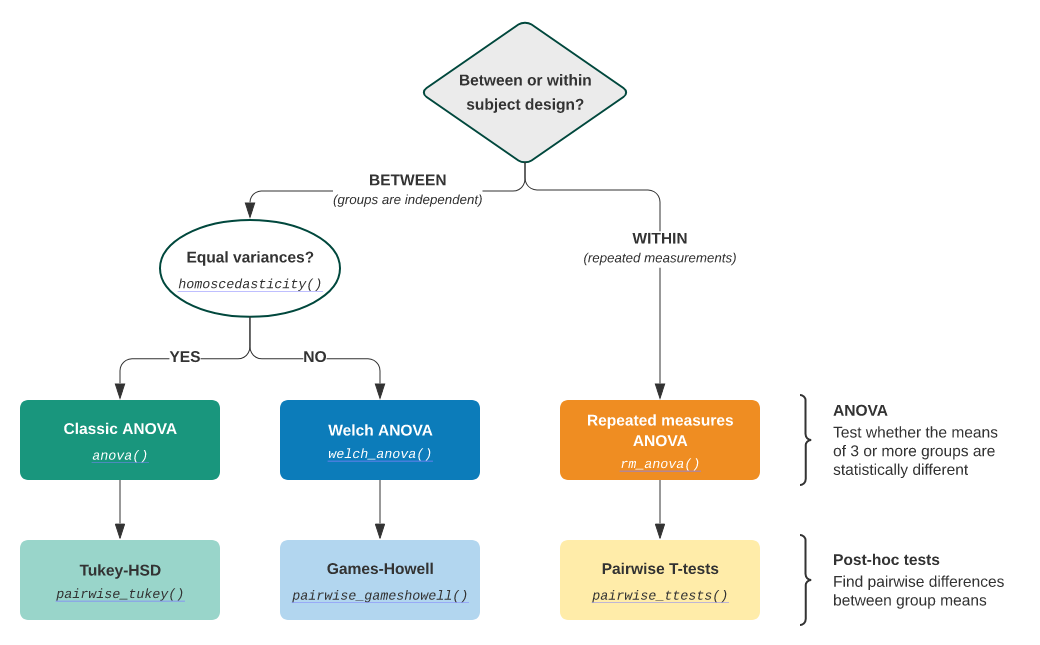

# Uji Equal Variance


In [67]:
from scipy.stats import levene, bartlett, f_oneway, kruskal

#Bartlett and Levene are test to see if the both sample have equal variance or not.
#Both test have H0: Equal Variance and H1: The Variance between the group is different

#We use the Bartlett test if the samples are come from the Normal Distribution and Levene test if the sample are skewed or 
#deviate from the normal distribution 

def try_equal_var(x1,x2):
    result = {'Bartlett': {'Bartlett-Stat' : bartlett(x1,x2)[0], 'P-Value': bartlett(x1,x2)[1] },
             'Levene': {'Levene-Stat': levene(x1,x2)[0], 'P-Value': levene(x1,x2)[1]}}
    return result
try_equal_var(youtube_10['views'], youtube_29['views'])

{'Bartlett': {'Bartlett-Stat': 42.17774401543469,
  'P-Value': 8.334313062671943e-11},
 'Levene': {'Levene-Stat': 1.8972437360796675, 'P-Value': 0.16843438710372255}}

Bisa lebih dari 2 group juga untuk menguji Variance Equal

In [68]:
bartlett(youtube_10['views'], youtube_29['views'], youtube_20['views'])

BartlettResult(statistic=1793.1708442941126, pvalue=0.0)

In [69]:
levene(youtube_10['views'], youtube_29['views'], youtube_20['views'])

LeveneResult(statistic=25.10777442642818, pvalue=1.358148958520443e-11)

In [70]:
#1. The samples are independent.
#2. Each sample is from a normally distributed population.
#3. The population standard deviations of the groups are all equal.  This
#   property is known as homoscedasticity.

#H0: population mean all equal between the group
#H1: at least one of the population mean between the group is not equal

f_oneway(youtube_10['views'], youtube_29['views'], youtube_20['views'])


F_onewayResult(statistic=22.988823625140867, pvalue=1.1148274978350597e-10)

In [71]:
from pingouin import welch_anova

In [72]:
youtube_10_20_29 = youtube[(youtube['category_id'] ==10) | (youtube['category_id'] ==20) | (youtube['category_id'] ==29)]

welch_anova(data = youtube_10_20_29, dv = 'views', between = 'category_id')

,Source,ddof1,ddof2,F,p-unc
0,category_id,2,150.976,129.873,1.548307e-33


Post Hoc (Multiple Comparison) Test
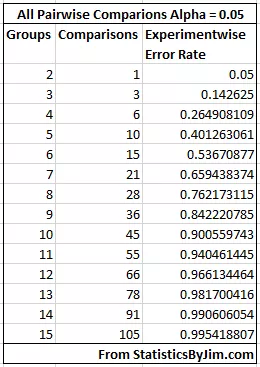

In [73]:
from pingouin import pairwise_tukey, pairwise_gameshowell

Tentang Effect Size
https://www.statisticssolutions.com/statistical-analyses-effect-size/

In [74]:
pairwise_tukey(data = youtube_10_20_29, dv = 'views', between = 'category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,p-tukey,hedges
0,10,20,6201003.12,2620830.63,3580172.489,540755.504,two-sided,6.621,0.001000,0.246
1,10,29,6201003.12,2963884.07,3237119.049,1937599.027,two-sided,1.671,0.216797,0.222
2,20,29,2620830.63,2963884.07,-343053.440,1995283.062,two-sided,-0.172,0.900000,-0.024


In [75]:
pairwise_gameshowell(data = youtube_10_20_29, dv = 'views', between = 'category_id')

,A,B,mean(A),mean(B),diff,se,tail,T,df,pval,hedges
0,10,20,6201003.12,2620830.63,3580172.489,156832.668,two-sided,16.142,6125.549,0.001000,0.599
1,10,29,6201003.12,2963884.07,3237119.049,681572.891,two-sided,3.358,60.731,0.002461,0.447
2,20,29,2620830.63,2963884.07,-343053.440,672464.548,two-sided,-0.361,57.549,0.900000,-0.049


## Non-Parametric

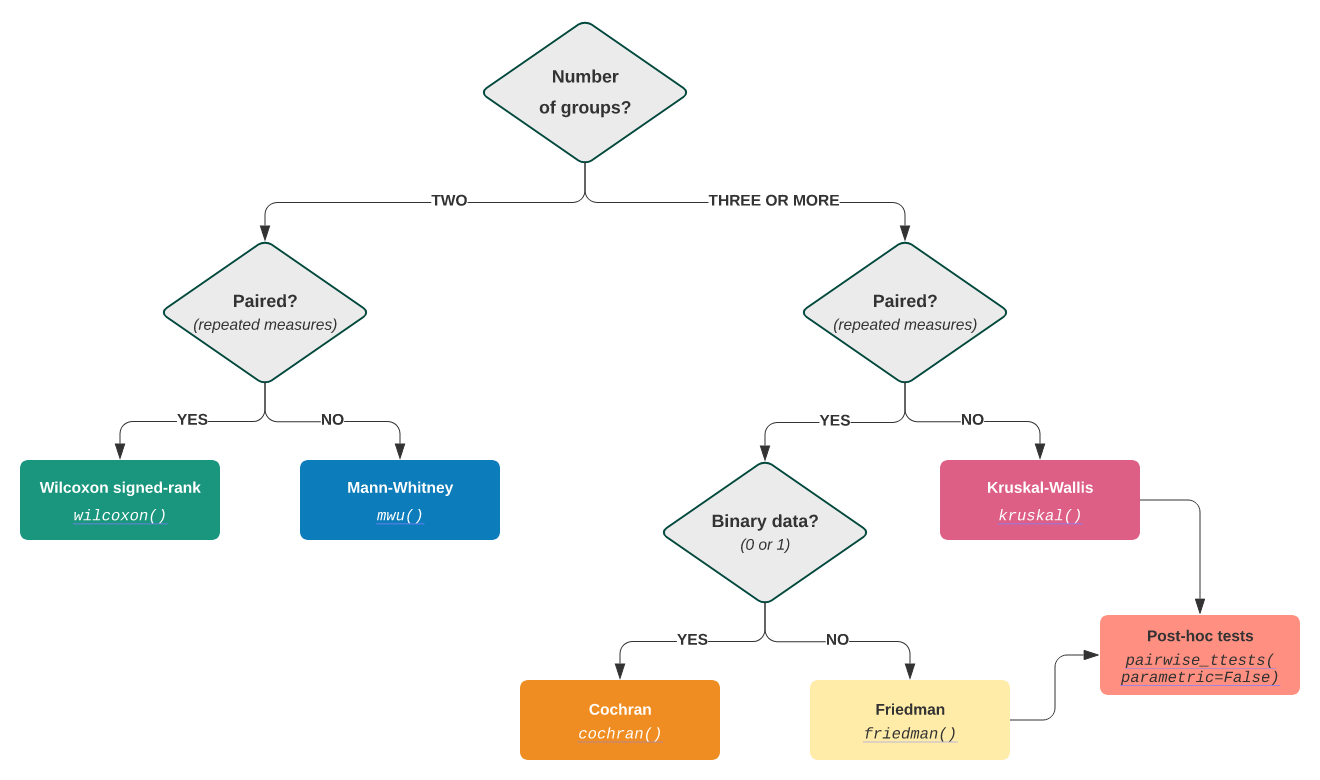

In [76]:
#H0: population median of all of the groups are equal.
#H1: population median of at least one of the group are not equal.
kruskal(youtube_10['views'], youtube_29['views'], youtube_20['views'])

KruskalResult(statistic=57.21993458049006, pvalue=3.757068198005064e-13)

In [77]:
from pingouin import pairwise_ttests

In [78]:
#Post hoc, jika paired pakai Wilcoxon kalau tidak pakai Mann-Whitney
pairwise_ttests(data = youtube_10_20_29, dv = 'views', between = 'category_id', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,category_id,10,20,False,False,2721072.5,two-sided,1.728277e-01,0.245
1,category_id,10,29,False,False,289925.5,two-sided,9.752584e-14,0.210
2,category_id,20,29,False,False,36507.5,two-sided,7.204730e-13,-0.096


## Question

How about season publish time? Would there any differences in Viewer, Likes, and Dislike? 

US have 4 season
Spring runs from March to May;
Summer runs from June to August;
Fall (autumn) runs from September to November; and
Winter runs from December to February.

In [79]:
youtube['publish_time'][0].month

11

In [80]:
def create_season(cols):
    if cols.month in [3,4,5]:
        return 'Spring'
    elif cols.month in [6,7,8]:
        return 'Summer'
    elif cols.month in [9,10,11]:
        return 'Fall'
    else:
        return 'Winter'

In [81]:
youtube['publish_season'] = youtube['publish_time'].apply(create_season)

In [82]:
youtube.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word,like_delta,publish_season
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,34,1410,54561,Fall
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1,62,630,91039,Fall
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2,53,1177,140694,Fall
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1,32,1403,9506,Fall
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2,24,636,130246,Fall


In [83]:
for i in ['views', 'likes', 'dislikes']:
    for key,val in {'spring' : youtube[youtube['publish_season'] == 'Spring'] , 
                    'summer' : youtube[youtube['publish_season'] == 'Summer'],
                   'fall' : youtube[youtube['publish_season'] == 'Fall'],
                   'winter' : youtube[youtube['publish_season'] == 'Winter']}.items():
        print(key+' '+i)
        print(try_normal(val[i]))

spring views
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3716.1813218754905}, 'Shapiro': 0.0, 'K^2': 0.0}
summer views
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 104.89138809636574}, 'Shapiro': 5.047589172375137e-40, 'K^2': 1.1802462873285782e-131}
fall views
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1076.0919247755273}, 'Shapiro': 0.0, 'K^2': 0.0}
winter views
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3746.367311313432}, 'Shapiro': 0.0, 'K^2': 0.0}
spring likes
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 3560.9829258459213}, 'Shapiro': 0.0, 'K^2': 0.0}
summer likes
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 164.14229803337196}, 'Shapiro': 2.802596928649634e-45, 'K^2': 5.1677471996842025e-164}
fall likes
{'Anderson': {15.0: 0.575, 10.0: 0.655, 

C:\Users\Admin\Anaconda3\lib\site-packages\scipy\stats\morestats.py:1676: UserWarning: p-value may not be accurate for N > 5000.
  warnings.warn("p-value may not be accurate for N > 5000.")


{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 4208.5911645473025}, 'Shapiro': 0.0, 'K^2': 0.0}
summer dislikes
{'Anderson': {15.0: 0.573, 10.0: 0.653, 5.0: 0.783, 2.5: 0.913, 1.0: 1.087, 'stat': 160.83754551439586}, 'Shapiro': 0.0, 'K^2': 3.942257894180237e-194}
fall dislikes
{'Anderson': {15.0: 0.575, 10.0: 0.655, 5.0: 0.786, 2.5: 0.917, 1.0: 1.091, 'stat': 1048.6575806115661}, 'Shapiro': 0.0, 'K^2': 0.0}
winter dislikes
{'Anderson': {15.0: 0.576, 10.0: 0.656, 5.0: 0.787, 2.5: 0.918, 1.0: 1.092, 'stat': 6110.555792955907}, 'Shapiro': 0.0, 'K^2': 0.0}


In [84]:
from pingouin import kruskal

In [85]:
kruskal(data = youtube, dv = 'views', between = 'publish_season' )

,Source,ddof1,H,p-unc
Kruskal,publish_season,3,7047.097,0.0


In [86]:
kruskal(data = youtube, dv = 'likes', between = 'publish_season' )

,Source,ddof1,H,p-unc
Kruskal,publish_season,3,5308.643,0.0


In [87]:
kruskal(data = youtube, dv = 'dislikes', between = 'publish_season' )

,Source,ddof1,H,p-unc
Kruskal,publish_season,3,4673.572,0.0


In [88]:
pairwise_ttests(data = youtube, dv = 'views', between = 'publish_season', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,publish_season,Fall,Spring,False,False,18752760.5,two-sided,0.000000e+00,-0.254
1,publish_season,Fall,Summer,False,False,814837.0,two-sided,3.671005e-126,-0.369
2,publish_season,Fall,Winter,False,False,36058817.5,two-sided,8.300967e-11,-0.001
3,publish_season,Spring,Summer,False,False,6734961.0,two-sided,1.134166e-03,0.044
4,publish_season,Spring,Winter,False,False,236050929.0,two-sided,0.000000e+00,0.309
5,publish_season,Summer,Winter,False,False,10706892.5,two-sided,3.980226e-121,0.480


In [89]:
pairwise_ttests(data = youtube, dv = 'likes', between = 'publish_season', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,publish_season,Fall,Spring,False,False,21531502.0,two-sided,0.000000e+00,-0.216
1,publish_season,Fall,Summer,False,False,909416.5,two-sided,6.920625e-102,-0.396
2,publish_season,Fall,Winter,False,False,36678916.5,two-sided,1.221096e-06,0.027
3,publish_season,Spring,Summer,False,False,6649032.5,two-sided,1.298305e-04,-0.086
4,publish_season,Spring,Winter,False,False,226079681.0,two-sided,0.000000e+00,0.281
5,publish_season,Summer,Winter,False,False,10382826.0,two-sided,4.104912e-100,0.637


In [90]:
pairwise_ttests(data = youtube, dv = 'dislikes', between = 'publish_season', parametric = False)

,Contrast,A,B,Paired,Parametric,U-val,Tail,p-unc,hedges
0,publish_season,Fall,Spring,False,False,21521402.0,two-sided,0.000000e+00,-0.207
1,publish_season,Fall,Summer,False,False,835874.0,two-sided,1.547882e-120,-0.556
2,publish_season,Fall,Winter,False,False,35099503.5,two-sided,1.615794e-19,-0.044
3,publish_season,Spring,Summer,False,False,6170166.5,two-sided,2.323327e-12,-0.090
4,publish_season,Spring,Winter,False,False,219874019.0,two-sided,0.000000e+00,0.047
5,publish_season,Summer,Winter,False,False,10487552.0,two-sided,1.106743e-106,0.073


In [91]:
for i in youtube['publish_season'].unique():
    print('Jumlah data musim {} ada {}'.format(i, len(youtube[youtube['publish_season']==i])))

Jumlah data musim Fall ada 4305
Jumlah data musim Spring ada 17948
Jumlah data musim Summer ada 805
Jumlah data musim Winter ada 17891


In [92]:
youtube_fall_winter = youtube[(youtube['publish_season']=='Winter') | (youtube['publish_season']=='Fall')]

In [93]:
mannwhitneyu(youtube[(youtube['publish_season']=='Winter')]['views'], 
            youtube[(youtube['publish_season']=='Fall')]['views'])

MannwhitneyuResult(statistic=36058817.5, pvalue=4.1504833349624317e-11)

Text(0.5, 1.0, 'Median of the US Youtube Trend Video by Total number of Views')

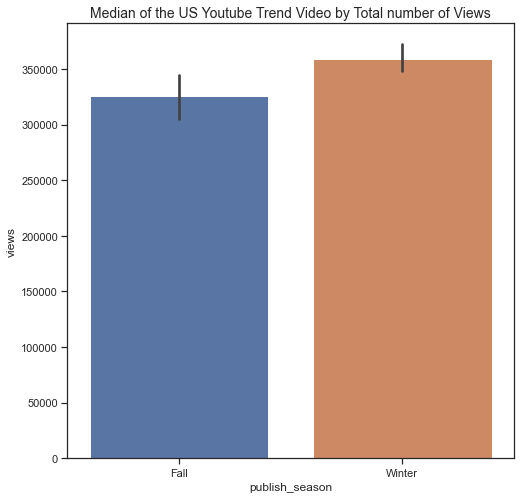

In [94]:
plt.figure(figsize = (8,8))
sns.barplot(data = youtube_fall_winter, y = 'views', x = 'publish_season', estimator = np.median)
plt.title('Median of the US Youtube Trend Video by Total number of Views', fontsize = 14)

Di pertanyaan ini saya mencoba menjawab apakah jika video kita publish di suatu musim apakah ada perbedaan jumlah view, likes, dan dislikesnya? 
Berarti sama seperti saya mengatakan kalau untuk trending video:
H0: views/likes/dislikes yang dipublish di season apapun tidak ada perbedaan
H1: views/likes/dislikes yang dipublish di season apapun ada perbedaan

Seperti uji yang kita lakukan diatas bahwa ada perbedaan baik secara views, likes maupun dislikes untuk disetiap musimnya. Hal ini menarik karena menandakan pada musim yang berbeda kita dapat mengatur strategi yang berbeda untuk membuat video kita menjadi trend.

Text(0.5, 1.0, 'Dislikes')

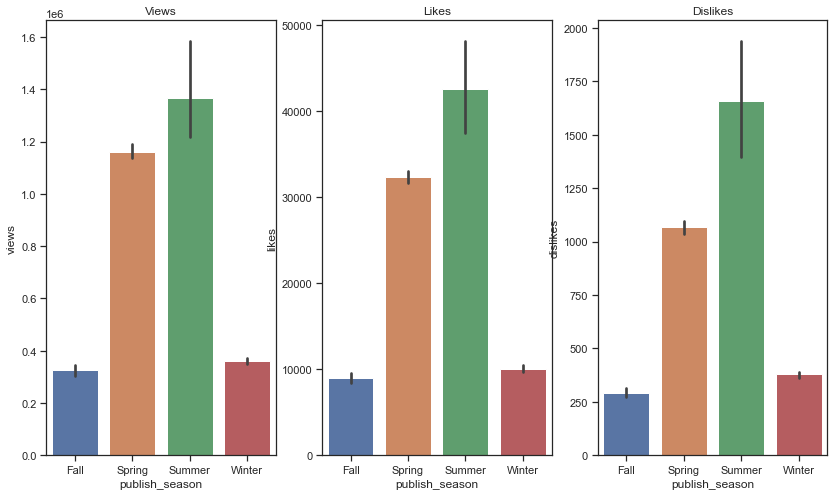

In [95]:
plt.figure(figsize =(14,8))
plt.subplot(1,3,1)
sns.barplot(data = youtube, x = 'publish_season', y ='views', estimator = np.median)
plt.title('Views')
plt.subplot(1,3,2)
sns.barplot(data = youtube, x = 'publish_season', y ='likes', estimator = np.median)
plt.title('Likes')
plt.subplot(1,3,3)
sns.barplot(data = youtube, x = 'publish_season', y ='dislikes', estimator = np.median)
plt.title('Dislikes')

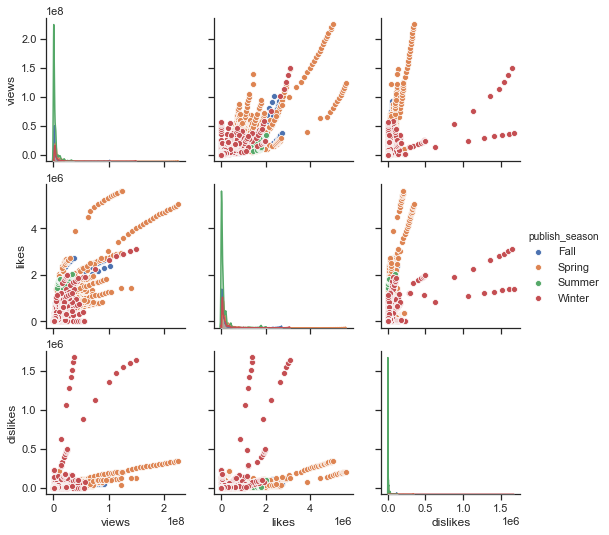

In [96]:
sns.pairplot(youtube[['views','likes', 'dislikes', 'publish_season']], hue = 'publish_season')

In [97]:
from pingouin import multivariate_normality

In [98]:
#Too much memory consumption for bigger data
# multivariate_normality(np.array(youtube[['views','likes','dislikes']]))

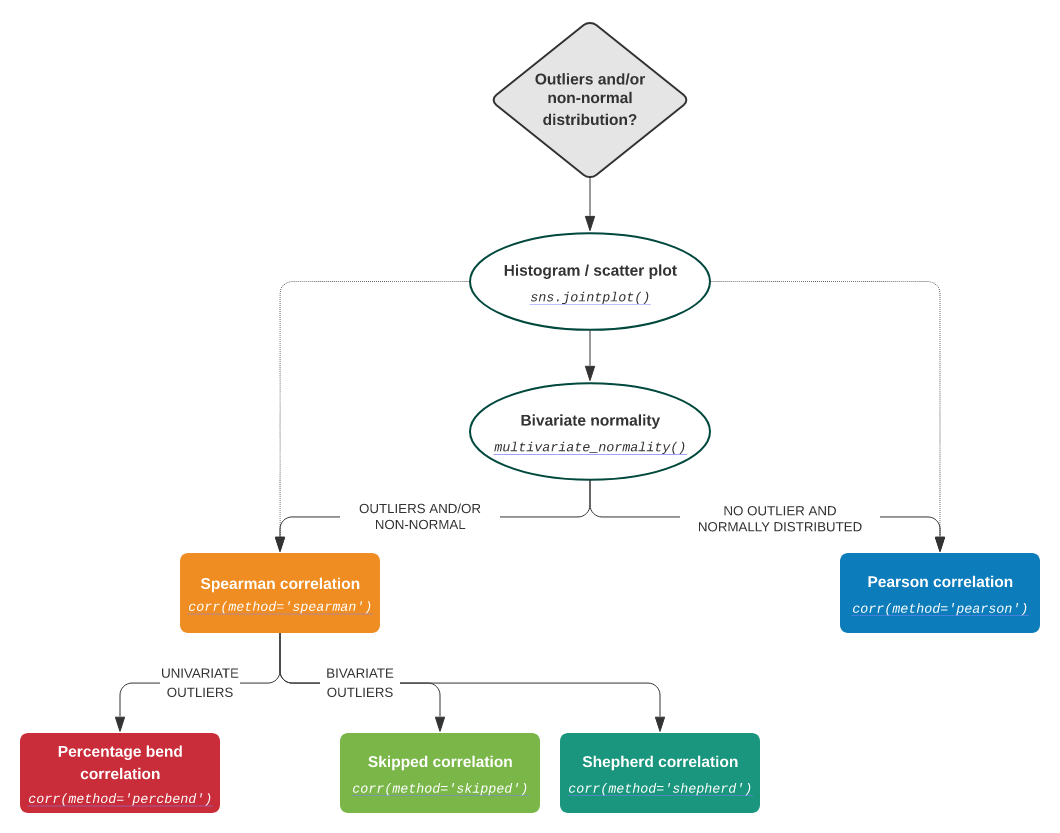

In [99]:
from pingouin import corr

In [100]:
youtube[['views', 'dislikes']].corr('pearson')

,views,dislikes
views,1.000000,0.472213
dislikes,0.472213,1.000000


In [101]:
corr(youtube['views'], youtube['dislikes'],method = 'pearson')
#H0: Tidak ada hubungan
#H1: Berhubungan

,n,r,CI95%,r2,adj_r2,p-val,BF10,power
pearson,40949,0.472,"[0.46, 0.48]",0.223,0.223,0.0,inf,1.0


In [102]:
import scipy.stats as ss

#Correlation measurement untuk data discrete dan continuous
def correlation_ratio(categories, measurements):
    fcat, _ = pd.factorize(categories)
    cat_num = np.max(fcat)+1
    y_avg_array = np.zeros(cat_num)
    n_array = np.zeros(cat_num)
    for i in range(0,cat_num):
        cat_measures = measurements[np.argwhere(fcat == i).flatten()]
        n_array[i] = len(cat_measures)
        y_avg_array[i] = np.average(cat_measures)
    y_total_avg = np.sum(np.multiply(y_avg_array,n_array))/np.sum(n_array)
    numerator = np.sum(np.multiply(n_array,np.power(np.subtract(y_avg_array,y_total_avg),2)))
    denominator = np.sum(np.power(np.subtract(measurements,y_total_avg),2))
    if numerator == 0:
        eta = 0.0
    else:
        eta = np.sqrt(numerator/denominator)
    return eta

#Correlation measurement untuk data discrete dan discrete
def cramers_v(x, y):
    confusion_matrix = pd.crosstab(x,y)
    chi2 = ss.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2-((k-1)*(r-1))/(n-1))
    rcorr = r-((r-1)**2)/(n-1)
    kcorr = k-((k-1)**2)/(n-1)
    return np.sqrt(phi2corr/min((kcorr-1),(rcorr-1)))

In [103]:
correlation_ratio(youtube['category_id'], youtube['views'])
#Correlation ratio menghasilkan value antara 0 hingga 1

0.23957517402805997

In [104]:
cramers_v(youtube['category_id'], youtube['publish_season'])
#sesama categorical

0.09792604656360905

## Multivariate Outlier

In [105]:
#For example if we want to find outlier between 3 columns
youtube_out_test = youtube[['views', 'likes', 'dislikes']]

In [106]:
from mahalanobis import Mahalanobis

In [107]:
youtube_out_test['mahala_pack'] = Mahalanobis(np.array(youtube_out_test),len(youtube_out_test)).distances

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [108]:
youtube_out_test

,views,likes,dislikes,mahala_pack
0,748374,57527,2966,0.311529
1,2418783,97185,6146,0.191899
2,3191434,146033,5339,0.429749
3,343168,10172,666,0.290097
4,2095731,132235,1989,0.547969
...,...,...,...,...
40944,1685609,38160,1385,0.179273
40945,1064798,60008,382,0.245676
40946,1066451,48068,1032,0.187450
40947,5660813,192957,2846,0.599505


In [109]:
from scipy.stats import chi2
chi2.ppf((1-0.01), df=2)

#Mahala distance more than 9.21 is considered as outlier with chi2 dist and df = 2 (number of cols)
#if using P-value then the H0 is Not outlier and the H1 is outlier

9.21034037197618

In [110]:
youtube_out_test['p-value'] = 1 - chi2.cdf(youtube_out_test['mahala_pack'], 2)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [111]:
youtube

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,...,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,trending_gap,title_total_word,description_total_word,like_delta,publish_season
0,2kyS6SvSYSE,2017-11-14,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13,SHANtell martin,748374,57527,2966,...,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,1,34,1410,54561,Fall
1,1ZAPwfrtAFY,2017-11-14,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13,"last week tonight trump presidency|""last week ...",2418783,97185,6146,...,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",1,62,630,91039,Fall
2,5qpjK5DgCt4,2017-11-14,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,...,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,2,53,1177,140694,Fall
3,puqaWrEC7tY,2017-11-14,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,...,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,1,32,1403,9506,Fall
4,d380meD0W0M,2017-11-14,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,...,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,2,24,636,130246,Fall
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40944,BZt0qjTWNhw,2018-06-14,The Cat Who Caught the Laser,AaronsAnimals,15,2018-05-18,"aarons animals|""aarons""|""animals""|""cat""|""cats""...",1685609,38160,1385,...,https://i.ytimg.com/vi/BZt0qjTWNhw/default.jpg,False,False,False,The Cat Who Caught the Laser - Aaron's Animals,27,28,46,36775,Spring
40945,1h7KV2sjUWY,2018-06-14,True Facts : Ant Mutualism,zefrank1,22,2018-05-18,[none],1064798,60008,382,...,https://i.ytimg.com/vi/1h7KV2sjUWY/default.jpg,False,False,False,NaN,27,26,3,59626,Spring
40946,D6Oy4LfoqsU,2018-06-14,I GAVE SAFIYA NYGAARD A PERFECT HAIR MAKEOVER ...,Brad Mondo,24,2018-05-18,I gave safiya nygaard a perfect hair makeover ...,1066451,48068,1032,...,https://i.ytimg.com/vi/D6Oy4LfoqsU/default.jpg,False,False,False,I had so much fun transforming Safiyas hair in...,27,84,775,47036,Spring
40947,oV0zkMe1K8s,2018-06-14,How Black Panther Should Have Ended,How It Should Have Ended,1,2018-05-17,"Black Panther|""HISHE""|""Marvel""|""Infinity War""|...",5660813,192957,2846,...,https://i.ytimg.com/vi/oV0zkMe1K8s/default.jpg,False,False,False,How Black Panther Should Have EndedWatch More ...,28,35,3268,190111,Spring


In [112]:
def name_outlier(col):
    if col < 0.01:
        return 'Outlier'
    else:
        return 'Not-outlier'
youtube_out_test['Out'] = youtube_out_test['p-value'].apply(name_outlier)

C:\Users\Admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


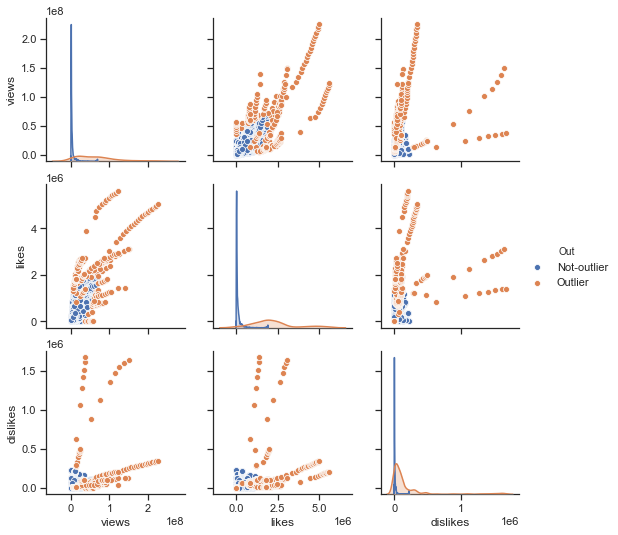

In [113]:
sns.pairplot(youtube_out_test[['views', 'likes', 'dislikes', 'Out']], hue = 'Out')

C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\Admin\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


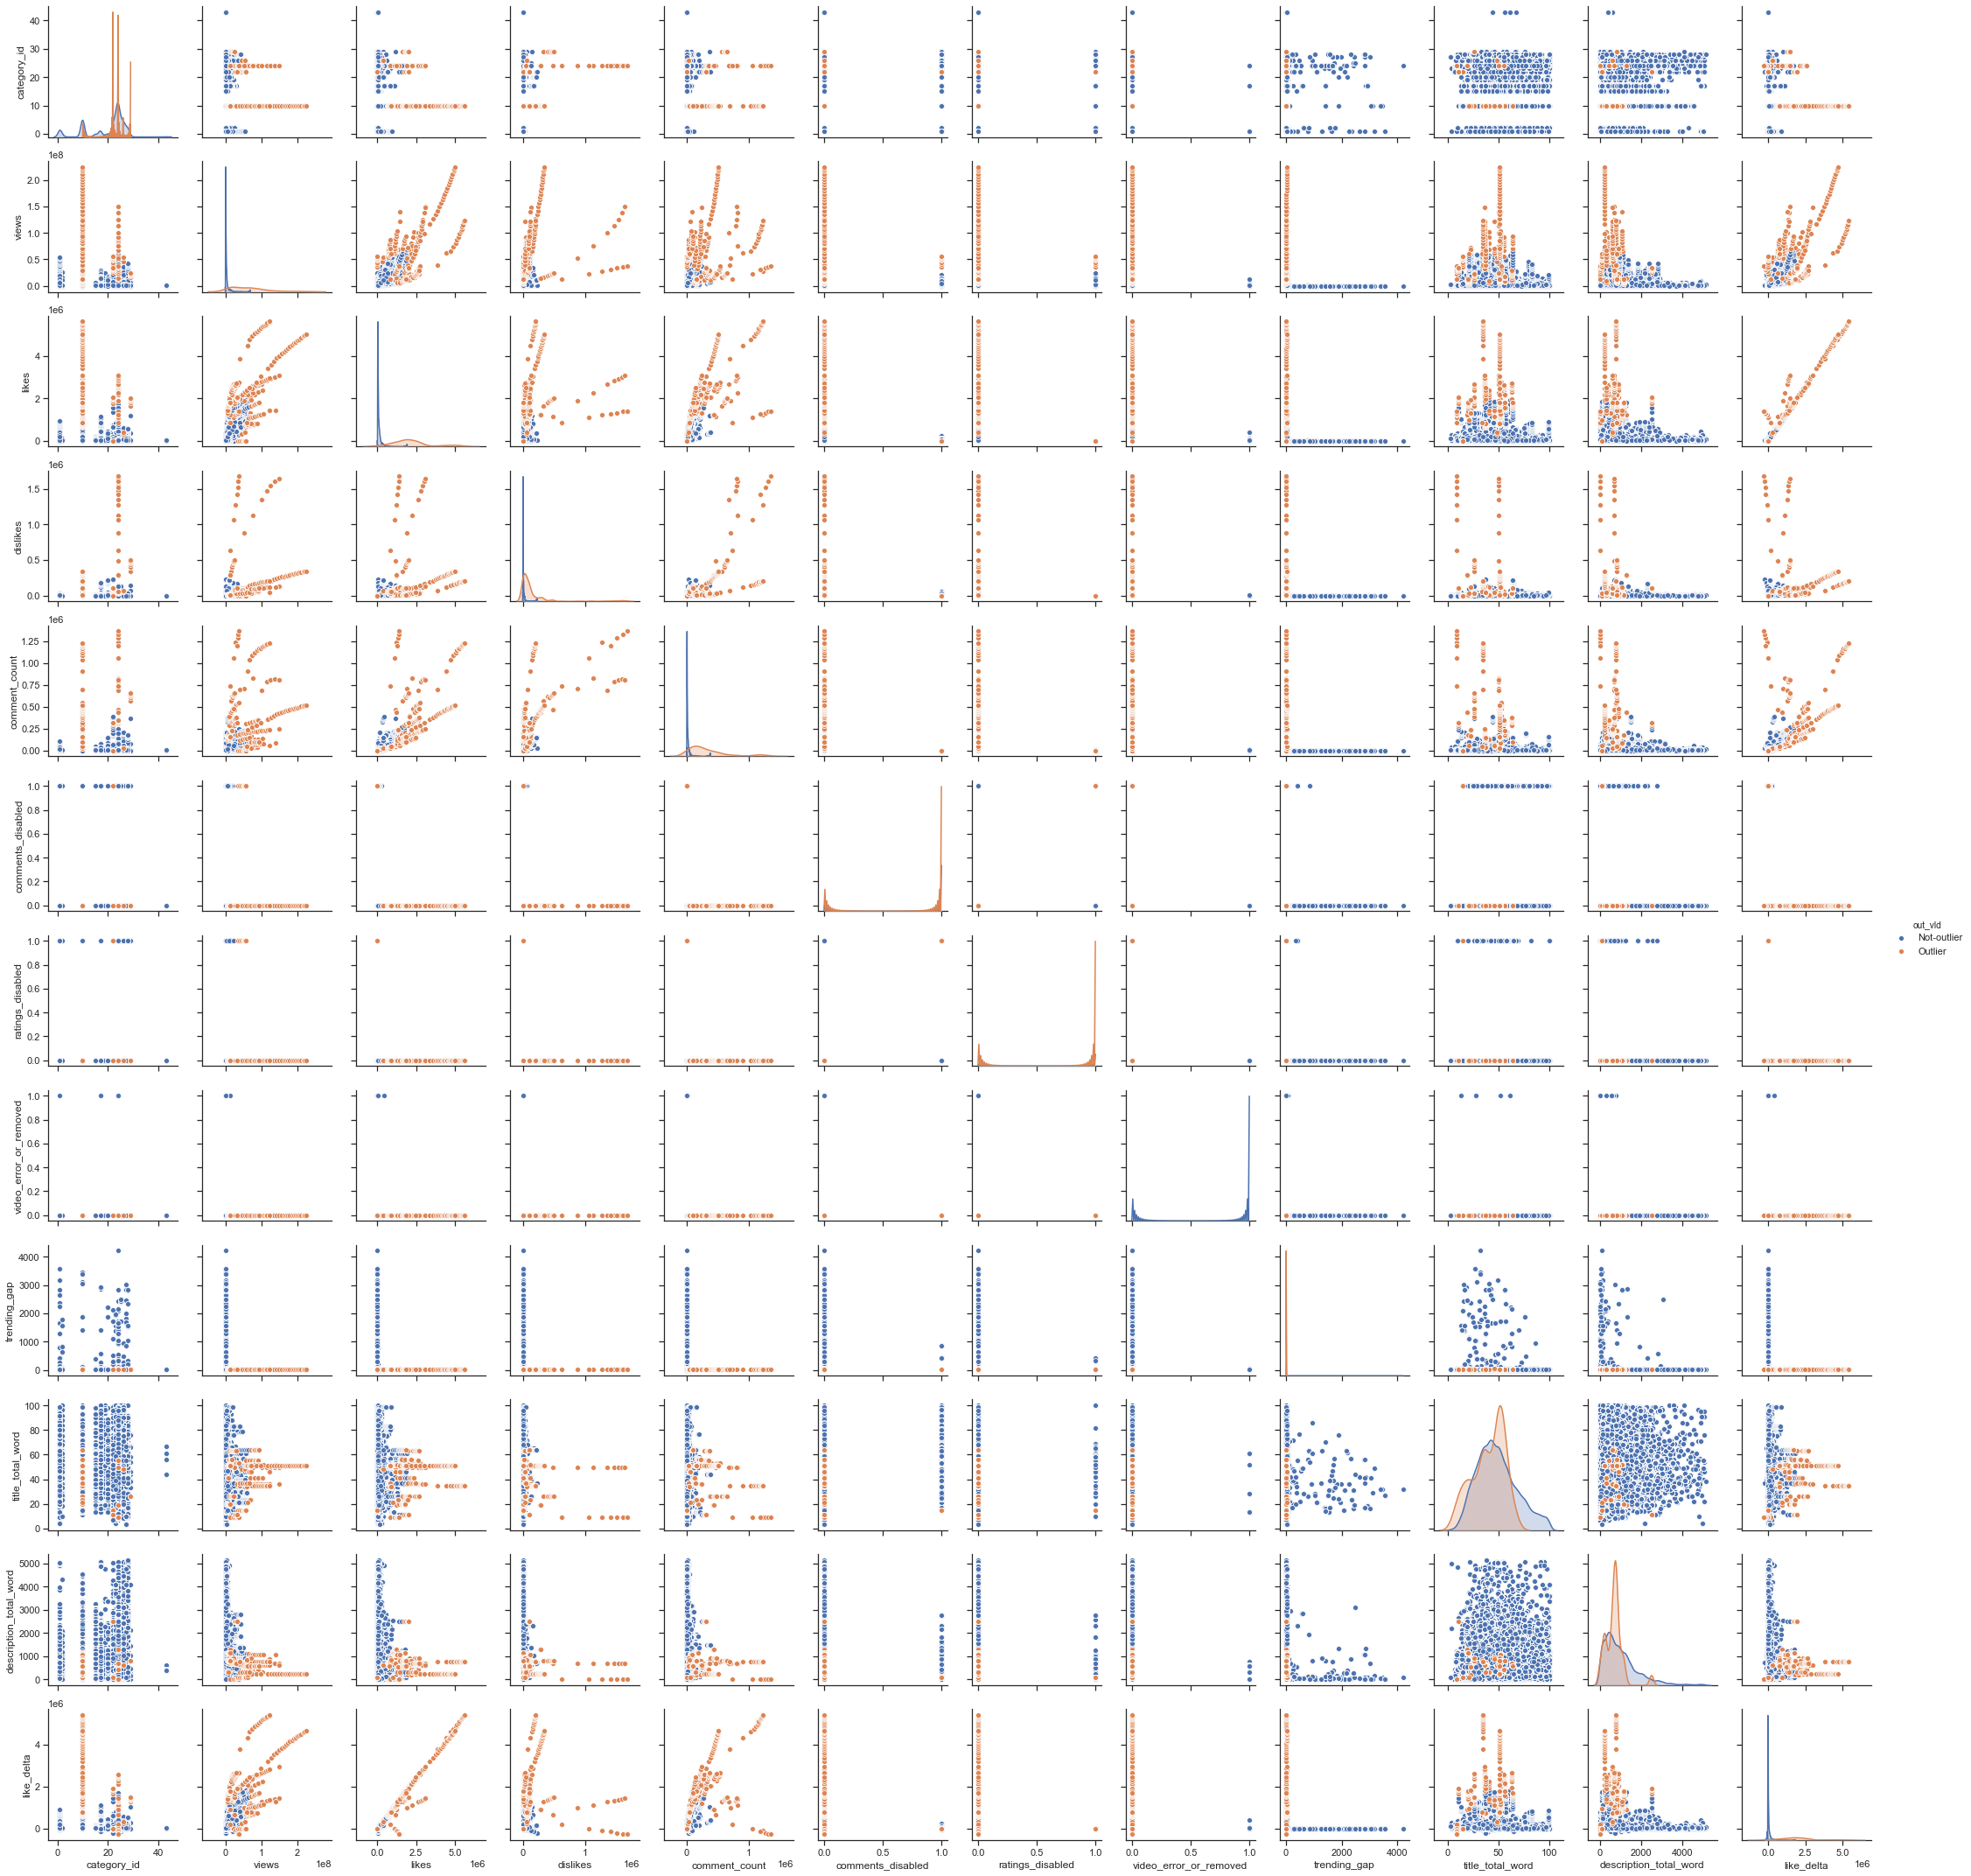

In [114]:
youtube['out_vld'] = youtube_out_test['Out']
sns.pairplot(data = youtube, hue = 'out_vld')

In [115]:
from scipy.stats import chi2_contingency
pd.crosstab(youtube['category_id'], youtube['publish_season'])

publish_season,Fall,Spring,Summer,Winter
category_id,,,,
1,232,991,71,1051
2,79,50,0,255
10,730,3071,153,2518
15,76,360,0,484
17,223,987,27,937
19,27,136,11,228
20,33,463,68,253
22,311,1392,44,1463
23,410,1516,41,1490


In [116]:
chi2_contingency(pd.crosstab(youtube['category_id'], youtube['publish_season']))
#H0: Tidak ada hubungan atau tidak ada pengaruh satu sama lain
#H1: Ada pengaruh atau ada hubungan

(1222.9573993867102,
 9.633940891446709e-227,
 45,
 array([[2.46531661e+02, 1.02781655e+03, 4.60994163e+01, 1.02455237e+03],
        [4.03702166e+01, 1.68307700e+02, 7.54890229e+00, 1.67773181e+02],
        [6.80406359e+02, 2.83668602e+03, 1.27230457e+02, 2.82767716e+03],
        [9.67203106e+01, 4.03237197e+02, 1.80859117e+01, 4.01956580e+02],
        [2.28554299e+02, 9.52867030e+02, 4.27377958e+01, 9.49840875e+02],
        [4.22625705e+01, 1.76197123e+02, 7.90275709e+00, 1.75637549e+02],
        [8.58918411e+01, 3.58092163e+02, 1.60610760e+01, 3.56954920e+02],
        [3.37469779e+02, 1.40694718e+03, 6.31041051e+01, 1.40247894e+03],
        [3.63437080e+02, 1.51520760e+03, 6.79597792e+01, 1.51039554e+03],
        [1.04752302e+03, 4.36723417e+03, 1.95878288e+02, 4.35336453e+03],
        [2.61460231e+02, 1.09005534e+03, 4.88909375e+01, 1.08659349e+03],
        [4.35872182e+02, 1.81719720e+03, 8.15045544e+01, 1.81142607e+03],
        [1.74096559e+02, 7.25826955e+02, 3.25546411e+01, 7.23

In [117]:
pd.get_dummies(youtube['publish_season'])
#membuat data menjadi kolom masing2

,Fall,Spring,Summer,Winter
0,1,0,0,0
1,1,0,0,0
2,1,0,0,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
40944,0,1,0,0
40945,0,1,0,0
40946,0,1,0,0
40947,0,1,0,0


In [118]:
pd.crosstab(youtube['category_id'] , pd.get_dummies(youtube['publish_season'])['Fall'])
#Nama lainnya OneHotEncoding

Fall,0,1
category_id,,
1,2113,232
2,305,79
10,5742,730
15,844,76
17,1951,223
19,375,27
20,784,33
22,2899,311
23,3047,410


In [119]:
0.05/youtube['publish_season'].nunique()

0.0125

In [120]:
dummies = pd.get_dummies(youtube['category_id'])
bon_p_value = 0.05/youtube['category_id'].nunique()

for series in dummies:
    if chi2_contingency(pd.crosstab(youtube['publish_season'], dummies[series]))[1] < bon_p_value:
        print('{} is to Reject Null Hypothesis'.format(series))
    else:
        print('{} Fail to Reject Null Hypothesis'.format(series))

1 is to Reject Null Hypothesis
2 is to Reject Null Hypothesis
10 is to Reject Null Hypothesis
15 is to Reject Null Hypothesis
17 Fail to Reject Null Hypothesis
19 is to Reject Null Hypothesis
20 is to Reject Null Hypothesis
22 Fail to Reject Null Hypothesis
23 is to Reject Null Hypothesis
24 is to Reject Null Hypothesis
25 is to Reject Null Hypothesis
26 is to Reject Null Hypothesis
27 is to Reject Null Hypothesis
28 is to Reject Null Hypothesis
29 is to Reject Null Hypothesis
43 is to Reject Null Hypothesis
